In [1]:
import pandas as pd
import numpy as np
import cptac
import cnvutils
import cptac.utils as ut
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CHROMOSOME = '8'

In [3]:
cnv = {
    'BRCA': cptac.Brca().get_CNV(),
    'CCRCC': cptac.Ccrcc().get_CNV(),
    'COLON': cptac.Colon().get_CNV(),
    'ENDO': cptac.Endometrial().get_CNV(),
    'GBM': cptac.Gbm().get_CNV(),
    'HNSCC': cptac.Hnscc().get_CNV(),
    'LSCC': cptac.Lscc().get_CNV(),
    'LUAD': cptac.Luad().get_CNV(),
    'OVARIAN': cptac.Ovarian().get_CNV()
}

cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/home/caleb/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 6)


cptac warning: The HNSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/home/caleb/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 7)


cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/home/caleb/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 8)


In [4]:
gene_locations = cnvutils.get_gene_locations()

In [5]:
def get_gain_counts(row):
    gain = len(row[row > 0.2])
    return gain

In [6]:
def get_loss_counts(row):
    loss = len(row[row < -0.2])
    return loss

In [7]:
cnv['LUAD']

Name,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00001,-0.0617,-0.2425,0.2653,0.2653,0.2548,-0.1085,-0.0400,-0.2365,-0.0502,-0.0400,...,-0.2310,-0.2425,0.1611,0.1611,-0.0449,0.2548,0.2548,-0.0463,-0.2441,-0.2397
C3L-00009,-0.0638,-0.0238,0.1814,0.1814,0.0070,-0.1128,-0.0482,0.2157,-0.0521,-0.0482,...,0.0426,-0.0238,0.0915,0.0915,-0.0482,0.0070,0.0070,0.0357,-0.0960,0.0070
C3L-00080,0.5650,-0.2897,-0.2499,-0.2499,-0.0467,-0.3407,0.4592,0.3043,-0.3445,0.4592,...,-0.0487,-0.0086,0.1957,0.1957,0.4592,-0.0467,-0.0467,-0.0495,1.1987,-0.0467
C3L-00083,-0.0060,0.0224,-0.0003,-0.0003,-0.0067,0.0104,-0.0141,0.0016,0.0016,-0.0141,...,0.0010,0.0224,0.0330,0.0330,-0.0154,-0.0067,-0.0067,0.0002,-0.0023,-0.0067
C3L-00093,-0.1628,-0.0388,-0.2018,-0.2018,-0.0075,-0.1330,-0.0040,0.0006,0.0006,-0.0040,...,-0.0766,-0.0388,-0.1111,-0.1111,-0.0040,-0.0075,-0.0075,0.2076,-0.2071,0.0084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-02729,0.2136,-0.3436,0.3787,0.3787,0.0093,-0.0137,-0.2898,-0.1998,0.3459,-0.2898,...,-0.3570,-0.3436,0.2593,0.2593,-0.2898,0.0093,0.0093,0.2709,-0.3742,-0.3339
X11LU013,-0.0701,0.0149,0.1758,0.1758,-0.2453,-0.0689,-0.2020,-0.6964,-0.2832,-0.1933,...,-0.2196,-0.2389,-0.0108,-0.0108,-0.2020,-0.2453,-0.2453,0.1180,-0.4435,-0.2453
X11LU016,-0.0852,-0.2595,-0.2532,-0.2532,-0.0436,-0.1652,0.0362,-0.0554,-0.0549,0.0380,...,-0.2622,-0.2595,0.1476,0.1476,0.0362,-0.0436,-0.0436,0.2499,-0.2045,-0.0436


In [8]:
cnv_8 = dict()
for cancer_type in cnv.keys():
    try:
        df = cnv[cancer_type].transpose()
        df['gain'] = df.apply(get_gain_counts, axis=1)
        df['loss'] = df.apply(get_loss_counts, axis=1)
        df = df.join(gene_locations)
        df = df[df.chromosome == '8']
        cnv_8[cancer_type] = df.melt(id_vars=['start_bp', 'end_bp'], value_vars=['gain', 'loss'], ignore_index=False)
    except:
        print(df)

In [12]:
# I was not able to find a good library for creating a visual of a chromosome
# with their banding patterns, so I wrote this function to do it for me.

# ideogram_data = pd.read_csv('NCBI_ideogram.csv') #cytoband infromation from NCBI
ideogram_data = cnvutils.get_cytoband_info()
chromo8 = ideogram_data[ideogram_data['#chromosome'] == CHROMOSOME]
colors = []
sections = list()
for index, row in chromo8.iterrows():
  sections.append((row['bp_start'], row['bp_stop']-row['bp_start']))
  if row['stain'] == 'gneg':
    colors.append('white')
  elif row['stain'] == 'gpos':
    if row['density'] == 25.0:
      colors.append('lightgray')
    elif row['density'] == 50.0:
      colors.append('gray')
    elif row['density'] == 75.0:
      colors.append('darkgray')
    else:
      colors.append('black')
  elif row['stain'] == 'acen':
    colors.append('red')
  else:
    colors.append('lightgray')

BRCA
CCRCC
COLON
ENDO
GBM
HNSCC
LSCC
LUAD
OVARIAN


Text(0.07, 0.5, 'Number of Samples')

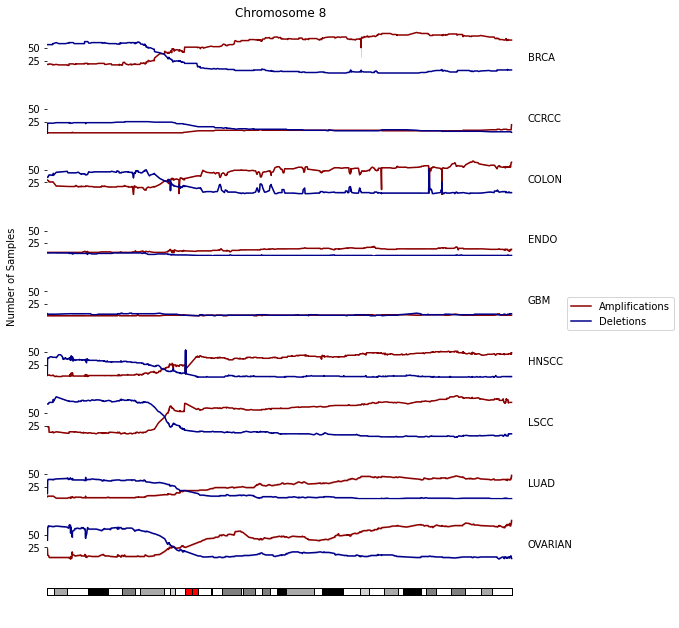

In [15]:
count = 0
end_bp = sections[len(sections) - 1][0] + sections[len(sections) - 1][1]
fig, axs = plt.subplots(nrows=len(cnv_8) + 1, sharex=True, sharey=True, num=0, figsize=(10,11), )
title = f'Chromosome 8'
fig.suptitle(title, y=0.9, x=0.45)
plt.xlim(0,175138636)
plt.xlim(0,end_bp + (end_bp/5))
plt.ylim(0, 100)
for cancer in cnv_8.keys():
    print(cancer)
    frame = cnv_8[cancer]
    axs[count].get_xaxis().set_visible(False)
    axs[count].set_yticks([25,50])
    axs[count].set_frame_on(False)
    axs[count].text(end_bp + 5000000, 25, cancer)
    # Testing out the location event stuff
    axs[count].axvline(52110839, 0, 75, color='b')
    axs[count].axvline(202660, 0, 75, color='b')
    axs[count].axvline(37421341, 0, 75, color='b')
    sns.lineplot(x="start_bp", y="value", hue="variable", palette=['darkred', 'darkblue'], data=frame, ax=axs[count], legend=False)
    axs[count].set_ylabel("")
    count += 1
plt.broken_barh(sections, (50,15), facecolors=colors, edgecolor="black")
plt.axis('off')
fig.legend(labels=("Amplifications", "Deletions"), loc='center right')
fig.text(0.07, 0.5, "Number of Samples", rotation="vertical")

In [11]:
dfs = list()
for cancer in cnv_8.keys():
    df = cnv_8[cancer]
    df['cancer'] = cancer
    dfs.append(df)
cnv_8_long = pd.concat(dfs)

In [12]:
cnv_8_long

,,start_bp,end_bp,variable,value,cancer
Name,Database_ID,,,,,
AARD,ENSG00000205002.3,116938207.0,116944487.0,gain,79,BRCA
ABRA,ENSG00000174429.3,106759483.0,106770244.0,gain,79,BRCA
ADAM18,ENSG00000168619.11,39584489.0,39730065.0,gain,49,BRCA
ADAM2,ENSG00000104755.10,39743735.0,39838289.0,gain,44,BRCA
ADAM28,ENSG00000042980.8,24294069.0,24359014.0,gain,22,BRCA
...,...,...,...,...,...,...
TRPA1,NaN,72019917.0,72075584.0,loss,8,OVARIAN
LETM2,NaN,38386207.0,38409527.0,loss,31,OVARIAN
CNBD1,ENSG00000176571.11,86866415.0,87615219.0,loss,15,OVARIAN


In [13]:
cnv_8_long = cnv_8_long.sort_values(['cancer', 'start_bp'])
cnv_8_long.reset_index(inplace=True)
cnv_8_long.to_csv('cnv_counts.tsv', sep='\t')

In [14]:
cnv_8_long

,Name,Database_ID,start_bp,end_bp,variable,value,cancer
0,OR4F21,ENSG00000176269.3,166049.0,167043.0,gain,18,BRCA
1,OR4F21,ENSG00000176269.3,166049.0,167043.0,loss,57,BRCA
2,RPL23AP53,ENSG00000223508.5,213186.0,232231.0,gain,18,BRCA
3,RPL23AP53,ENSG00000223508.5,213186.0,232231.0,loss,57,BRCA
4,ZNF596,ENSG00000172748.7,232137.0,264703.0,gain,18,BRCA
...,...,...,...,...,...,...,...
33251,C8orf33,ENSG00000182307.12,145052465.0,145066685.0,gain,78,OVARIAN
33252,C8orf33,NaN,145052465.0,145066685.0,gain,78,OVARIAN
33253,C8orf33,ENSG00000182307.8,145052465.0,145066685.0,loss,3,OVARIAN
33254,C8orf33,ENSG00000182307.12,145052465.0,145066685.0,loss,3,OVARIAN


In [15]:
# g = sns.FacetGrid(cnv_8_long, row='cancer', hue='variable')
# g.map(sns.barplot,"Name","value")

In [16]:
# luad_cnv_8 = cnv_8['LUAD']
# luad_cnv_8_loss = luad_cnv_8[(luad_cnv_8.variable == 'loss')].sort_values('start_bp')

In [17]:
# list(luad_cnv_8_loss.value)

In [18]:
# luad_cnv_8 = cnv_8['LUAD']
# luad_cnv_8_loss = luad_cnv_8[(luad_cnv_8.variable == 'loss')].sort_values('start_bp')
# values = list(luad_cnv_8_loss.value)
# luad_loss_events = list()
# start = None
# for i in range(0, len(values)):
#     val = values[i]
#     if val > 20:
#         if start is None:
#             start = i
#     else:
#         if start is not None:
#             luad_loss_events.append((start, i))
#             start = None

In [19]:
# luad_loss_events

In [20]:
# luad_cnv_8_loss.iloc[2: 631]

In [21]:
for cancer in cnv_8.keys():
    df = cnv_8[cancer]
    df_loss = df[(df.variable == 'loss')].sort_values('start_bp')
    values = list(df_loss.value)
    loss_events = list()
    start = None
    for i in range(0, len(values)):
        val = values[i]
        if val > 20:
            if start is None:
                start = i
        else:
            if start is not None:
                loss_events.append((start, i))
                start = None
                
    event_locations = list()
    for event in loss_events:
        event_locations.append((df_loss.iloc[event[0]].start_bp, df_loss.iloc[event[1]].start_bp))
    print(cancer)
    print(event_locations)

BRCA
[(166049.0, 43034194.0)]
CCRCC
[(232137.0, 42697366.0)]
COLON
[(166049.0, 38600661.0), (38728186.0, 39314591.0), (54046367.0, 54457935.0), (66562175.0, 67173511.0), (70051651.0, 70109782.0), (119325171.0, 119557086.0), (123348034.0, 123416726.0)]
ENDO
[]
GBM
[]
HNSCC
[(202660.0, 35525176.0), (43284626.0, 43292483.0), (43372559.0, 43378297.0)]
LSCC
[(166049.0, 37695782.0)]
LUAD
[(232137.0, 41261962.0)]
OVARIAN
[(166049.0, 40530590.0), (41645177.0, 41929479.0)]
